In [29]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [30]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2*x*z*math.e-2*y**3+y**2-3*z**3
   return fitness

In [31]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [32]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [33]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [34]:
import numpy as np
from random import randint
import math

num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[-53.03215182 -50.71367449 -24.4528345 ]
 [-85.65352979  57.5208607  -72.94470809]
 [-60.06902328 -39.4753339   74.58542105]
 [ 15.22303456 -50.42881218 -88.85192038]
 [ 64.54069094  13.7597023    5.18077816]
 [ 33.28502043   8.87095572 -14.09751965]
 [ 36.67298851  13.07524777  42.65426585]
 [ 47.60675796  38.70805425  47.56859156]
 [-27.11212043  80.03746638 -25.88759778]
 [ 88.22536432 -25.97185023  14.32159648]
 [ 66.44404817  -1.08591243  81.92641976]
 [-57.81949763 -40.1012309   82.69538361]
 [ -0.47285641  63.49975747 -25.44923849]
 [-88.97243907 -95.37175725  31.09409207]
 [-61.13635911  38.04243628 -16.337674  ]
 [ 47.53278452 -64.28974531  88.40533235]
 [-49.97646175  -0.67701972  24.88054684]
 [-33.17410982  12.46715584  -8.37416382]
 [-77.16839028  11.41563916 -63.48782595]
 [ 67.55320819 -58.99491848   4.24132013]
 [-75.7161493  -54.27986596 -33.12676051]
 [-87.85890949 -98.59849094  24.81896379]
 [-52.74198201 -80.06592245 -56.35776005]
 [ 92.26448721 -95.92744594  96.98

/tmp/ipykernel_21526/4059749975.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value


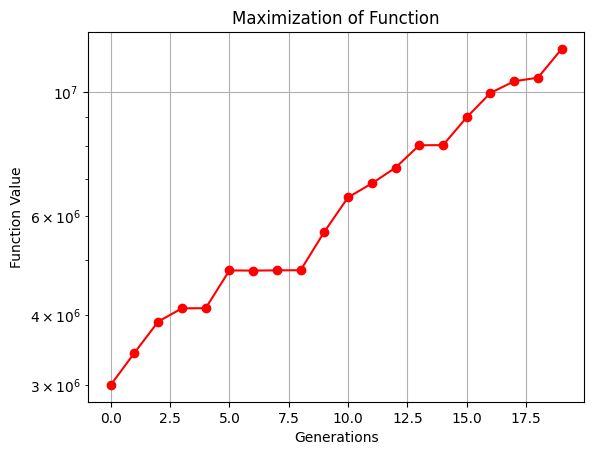

In [35]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()
